In [2]:
%pylab inline
import jellyfish
import biff
import pygadgetreader
import coeff_noise
from scipy import special
import coefficients_smoothing

Populating the interactive namespace from numpy and matplotlib


In [3]:
G_gadget=43007.1

In [4]:
mass = 1.577212515257997438e-06

In [5]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

In [6]:
# Compute LMC accelration field
# Compute Wake accelration field

In [7]:
# Add the fields.

In [8]:
S_lmc, T_lmc = coefficients_smoothing.read_coeff_matrix('./LMC/coeff_rand_lmc5_1E6_0', 107, 30, 20, 20, 0, 107)
SS_lmc, TT_lmc, ST_lmc = coefficients_smoothing.read_cov_elements('./LMC/cov_matrix_rand_lmc5_1E6_0', 107, 30, 20, 20, 0, 107)
S_smooth_lmc, T_smooth_lmc, N_smooth_lmc = coefficients_smoothing.smooth_coeff_matrix(S_lmc, T_lmc, SS_lmc, 
                                                                                      TT_lmc, ST_lmc, mass,
                                                                                      30, 20, 20, 5)


OSError: ./LMC/coeff_rand_lmc5_1E6_0000_snap_0000.txt not found.

In [222]:
N_smooth_lmc

505

In [18]:
S_mw, T_mw = coefficients_smoothing.read_coeff_matrix('../data/bootstrap_mwlmc_1e6_b1_test/coeff_rand_mwlmc5_b1_2_1E6_00', 150, 20, 20, 20, 0, 150)
SS_mw, TT_mw, ST_mw = coefficients_smoothing.read_cov_elements('../data/bootstrap_mwlmc_1e6_b1_test/cov_matrix_rand_mwlmc5_b1_2_1E6_00', 150, 20, 20, 20, 0, 150)
S_smooth_mw, T_smooth_mw, N_smooth_mw = coefficients_smoothing.smooth_coeff_matrix(S_mw, T_mw, SS_mw, TT_mw, ST_mw, mass, 20, 20, 20, 4)


/home/xzk/work/github/MW-LMC-SCF/code/coefficients_smoothing.py:98: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [172]:
y_grid = np.arange(-300, 300, 5.5)
z_grid = np.arange(-300, 300, 5.5)
y_grid, z_grid = meshgrid(y_grid, z_grid)

xyz = np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())),
                                     y_grid.flatten(), z_grid.flatten()]).T)


In [20]:
xlmc_com = 1
ylmc_com = -41
zlmc_com = -28


In [96]:
y_grid2 = np.arange(-300-ylmc_com, 300-ylmc_com, 5.5)
z_grid2 = np.arange(-300-zlmc_com, 300-zlmc_com, 5.5)
y_grid2, z_grid2 = meshgrid(y_grid2, z_grid2)

xyz2 = np.ascontiguousarray(np.array([np.ones(len(y_grid.flatten()))-xlmc_com,
                                     y_grid.flatten(), z_grid.flatten()]).T)

In [39]:
1e8/1E6

100.0

In [41]:
15E6/1E6

15.0

In [35]:
2E7*mass

31.54425030515995

In [89]:
S_smooth_wake = np.copy(S_smooth_mw)
T_smooth_wake = np.copy(T_smooth_mw)
S_smooth_wake[0,0,0] = 0
T_smooth_wake[0,0,0] = 0

In [84]:
S_smooth_000 = np.zeros((3,1,1))
T_smooth_000 = np.zeros((3,1,1))

In [85]:
S_smooth_000[0,0,0] = S_smooth_mw[0,0,0]
T_smooth_000[0,0,0] = T_smooth_mw[0,0,0]

In [44]:
rho_lmc = biff.density(xyz, S_smooth_lmc, T_smooth_lmc, M=15, r_s=10)
rho_mw = biff.density(xyz, S_smooth_mw, T_smooth_mw, M=100, r_s=40.85)

In [86]:
rho_mono = biff.density(xyz, S_smooth_000.astype(double), T_smooth_000.astype(double), M=100, r_s=40.85)

In [223]:
a_mono = biff.gradient(xyz, S_smooth_000.astype(double), T_smooth_000.astype(double), M=100, r_s=40.85, G=G_gadget)

In [235]:
pot_mono = biff.potential(xyz, S_smooth_000.astype(double), T_smooth_000.astype(double), M=100, r_s=40.85, G=G_gadget)

In [224]:
a_mono_all = np.sqrt(a_mono[:,0]**2 + a_mono[:,1]**2 + a_mono[:,2]**2)

In [90]:
rho_wake = biff.density(xyz, S_smooth_wake, T_smooth_wake, M=100, r_s=40.85)

In [173]:
a_wake = biff.gradient(xyz, S_smooth_wake, T_smooth_wake, M=100, r_s=40.85, G=G_gadget)
a_lmc = biff.gradient(xyz, S_smooth_lmc, T_smooth_lmc, M=15, r_s=40.85, G=G_gadget)

In [174]:
a_wake_all = np.sqrt(a_wake[:,0]**2 + a_wake[:,1]**2 + a_wake[:,2]**2)
a_lmc_all = np.sqrt(a_lmc[:,0]**2 + a_lmc[:,1]**2 + a_lmc[:,2]**2)

In [107]:
rho_mwlmc = np.zeros((110, 110))
for i in range(110):
    for j in range(110):
        rho_mwlmc[i][j] = biff.density(np.array([[0-xlmc_com], [y_grid2[0][i]], [z_grid2[j,0]]]).T,
                                      S_smooth_lmc, T_smooth_lmc, M=15,r_s=10) + \
                            biff.density(np.array([[0], [y_grid[0][i]], [z_grid[j,0]]]).T, S_smooth_mw,
                                      T_smooth_mw, M=100, r_s=40.85)


In [124]:
rho_mwlmc_wake = np.zeros((110, 110))
for i in range(110):
    for j in range(110):
        rho_mwlmc_wake[i][j] = biff.density(np.array([[0-xlmc_com], [y_grid2[0][i]], [z_grid2[j,0]]]).T,
                                      S_smooth_lmc, T_smooth_lmc, M=15,r_s=10) -\
                            biff.density(np.array([[0], [y_grid[0][i]], [z_grid[j,0]]]).T, S_smooth_wake,
                                      T_smooth_wake, M=100, r_s=40.85)

In [175]:
a_mwlmc_wake = np.zeros((110, 110))
for i in range(110):
    for j in range(110):
        a_mwlmc_wake_lmc = biff.gradient(np.array([[0-xlmc_com], [y_grid2[0][i]], [z_grid2[j,0]]]).T,
                                      S_smooth_lmc, T_smooth_lmc, M=15,r_s=10, G=G_gadget) 
        a_mwlmc_wake_all = biff.gradient(np.array([[0], [y_grid[0][i]], [z_grid[j,0]]]).T, S_smooth_wake,
                                      T_smooth_wake, M=100, r_s=40.85, G=G_gadget)
        a_mwlmc_wake[i][j] = np.sqrt(a_mwlmc_wake_all[:,0]**2 + a_mwlmc_wake_all[:,1]**2 + a_mwlmc_wake_all[:,2]**2)/\
                             np.sqrt(a_mwlmc_wake_lmc[:,0]**2 + a_mwlmc_wake_lmc[:,1]**2 + a_mwlmc_wake_lmc[:,2]**2) 

In [189]:
a_lmc = np.zeros((110, 110))
for i in range(110):
    for j in range(110):
        a_mwlmc_wake_lmc = biff.gradient(np.array([[0-xlmc_com], [y_grid2[0][i]], [z_grid2[j,0]]]).T,
                                      S_smooth_lmc, T_smooth_lmc, M=15,r_s=10, G=G_gadget) 
        a_lmc[i][j] = np.sqrt(a_mwlmc_wake_lmc[:,0]**2 + a_mwlmc_wake_lmc[:,1]**2 + a_mwlmc_wake_lmc[:,2]**2) 

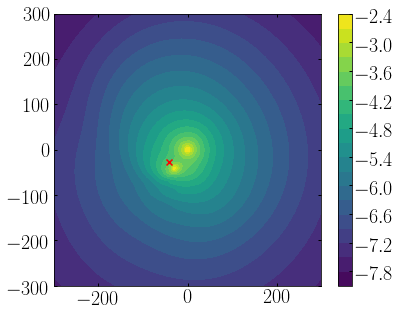

In [140]:
figure(figsize=(6,5))
contourf(y_grid, z_grid, np.log10(rho_mwlmc), 20, origin='lower')
colorbar()
scatter(ylmc_com, zlmc_com, c='r', marker='x')

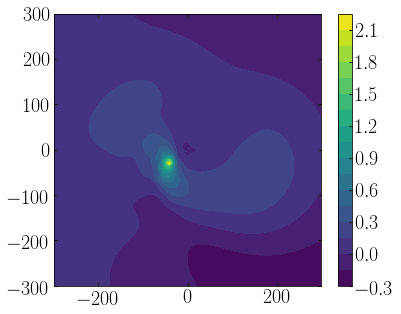

In [118]:
figure(figsize=(6,5))
contourf(y_grid, z_grid, np.log10(rho_mwlmc/rho_mono.reshape(110, 110)).T, 20, origin='lower')
colorbar()

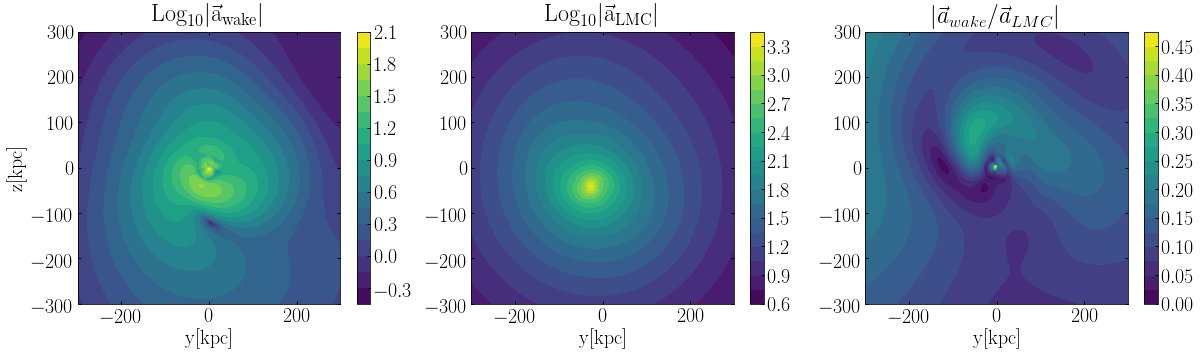

In [218]:
figure(figsize=(20,5))
subplot(1, 3, 1)
title(r'$\rm{Log}_{10}|\vec{a}_{wake}|$')
contourf(y_grid, z_grid, np.log10(np.abs(a_wake_all.reshape(110, 110))), 20, origin='lower')
colorbar()
xlabel('y[kpc]')
ylabel('z[kpc]')

subplot(1, 3, 2)
title(r'$\rm{Log}_{10}|\vec{a}_{LMC}|$')
contourf(y_grid, z_grid, np.log10(np.abs(a_lmc.reshape(110, 110))), 20, origin='lower')
colorbar()

xlabel('y[kpc]')

subplot(1, 3, 3)
title(r'$|\vec{a}_{wake}/\vec{a}_{LMC}|$')
contourf(y_grid, z_grid, ((a_mwlmc_wake)), 20, origin='lower')
colorbar()
xlabel('y[kpc]')
#scatter(ylmc_com+15.5, zlmc_com-5.5, c='r', marker='x')
savefig('a_wake_lmc.pdf', bbox_inches='tight')

In [ ]:
figure(figsize=(6,5))
contourf(y_grid, z_grid, np.log10(rho_mwlmc/rho_mwlmc.reshape(110, 110)).T, 20, origin='lower')
colorbar()

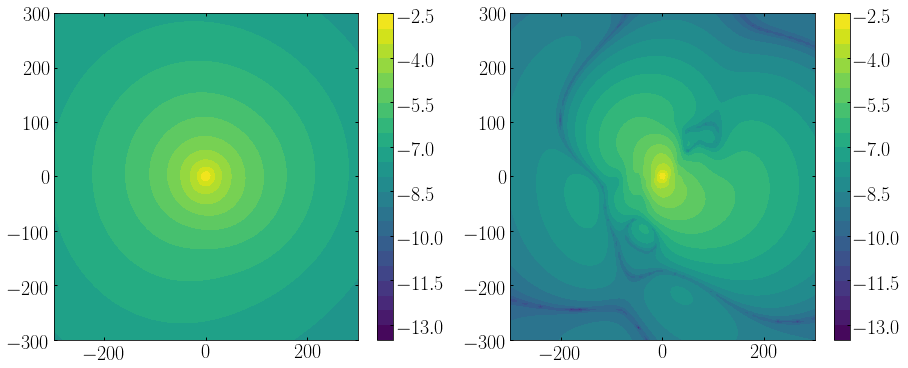

In [111]:
figure(figsize=(15,6))
subplot(1, 2, 1)
levels = np.arange(-13.5, -2, 0.5)
contourf(y_grid, z_grid, np.log10(np.abs(rho_mw.reshape(110, 110))),20,  
         origin='lower', levels=levels)
colorbar()

subplot(1, 2, 2)
contourf(y_grid, z_grid, np.log10(np.abs(rho_lmc.reshape(110, 110))), 20,
        levels=levels)
colorbar()

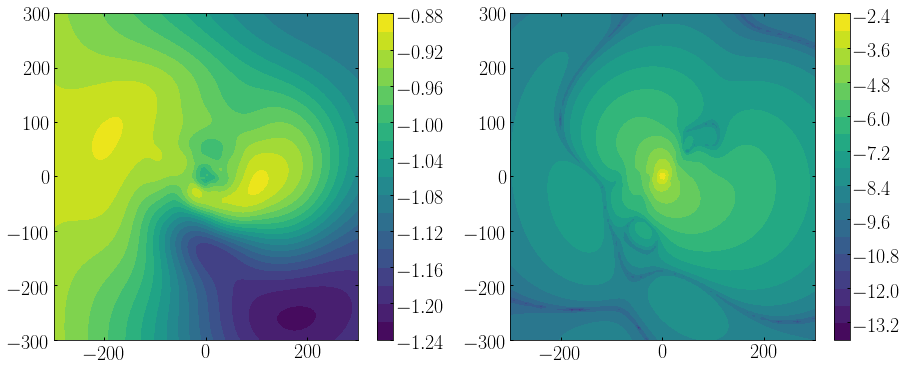

In [87]:
figure(figsize=(15,6))
subplot(1, 2, 1)
contourf(y_grid, z_grid, np.log10((np.abs(rho_mw.reshape(110, 110)/rho_mono.reshape(110,110))))-1,20,  
         origin='lower')
colorbar()

subplot(1, 2, 2)
contourf(y_grid, z_grid, np.log10(np.abs(rho_lmc.reshape(110, 110))), 20)
colorbar()

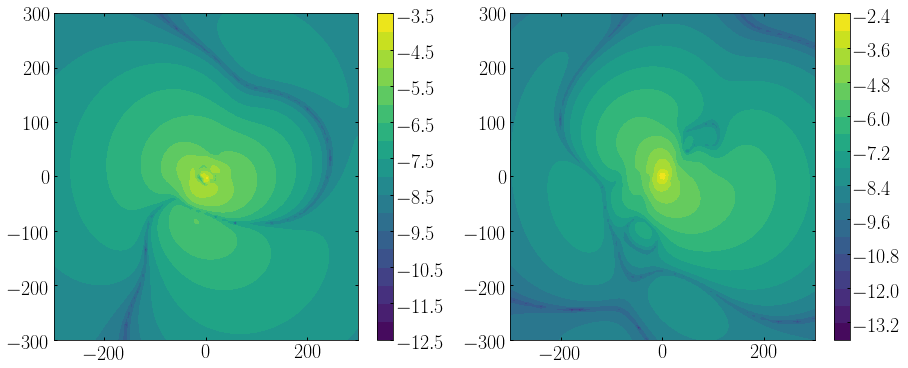

In [211]:
figure(figsize=(15,6))
subplot(1, 2, 1)
contourf(y_grid, z_grid, np.log10(np.abs(rho_wake.reshape(110, 110))),20,  
         origin='lower')
colorbar()

subplot(1, 2, 2)
contourf(y_grid, z_grid, np.log10(np.abs(rho_lmc.reshape(110, 110))), 20)
colorbar()

In [327]:
a_lmc = biff.gradient(xyz, S_lmc_1e6, T_lmc_1e6, M=1E6*11.41, r_s=10, G=G_gadget)
a_mw = biff.gradient(xyz, S_matrix_mw_1e6_opt, T_matrix_mw_1e6_opt, M=1, r_s=40.85, G=G_gadget)

In [33]:
a_mono = biff.gradient(xyz, S_mwlmc_000, T_mwlmc_000, M=1, r_s=40.85, G=G_gadget)

In [328]:
a_mw_all = np.sqrt(a_mw[:,0]**2 + a_mw[:,1]**2 + a_mw[:,2]**2)
a_lmc_all = np.sqrt(a_lmc[:,0]**2 + a_lmc[:,1]**2 + a_lmc[:,2]**2)
a_mono_all = np.sqrt(a_mono[:,0]**2 + a_mono[:,1]**2 + a_mono[:,2]**2)

In [195]:
a_ratio_all = np.zeros((110, 110))
for i in range(110):
    for j in range(110):
        a_all = biff.gradient(np.array([[0-xlmc_com], [y_grid2[0][i]], [z_grid2[j,0]]]).T,
                                      S_smooth_lmc, T_smooth_lmc, M=15,r_s=10, G=G_gadget) + \
                            biff.gradient(np.array([[0], [y_grid[0][i]], [z_grid[j,0]]]).T, S_smooth_mw,
                                      T_smooth_mw, M=100, r_s=40.85, G=G_gadget)
        a_ratio_all[i][j] = np.sqrt(a_all[0][0]**2 + a_all[0][1]**2 + a_all[0][2]**2)

In [196]:
pot_ratio_all = np.zeros((110, 110))
for i in range(110):
    for j in range(110):
        pot_ratio_all[i][j] = biff.potential(np.array([[0-xlmc_com], [y_grid2[0][i]], [z_grid2[j,0]]]).T,
                                     S_smooth_lmc, T_smooth_lmc, M=15,r_s=10, G=G_gadget) + \
                            biff.potential(np.array([[0], [y_grid[0][i]], [z_grid[j,0]]]).T, S_smooth_mw,
                                      T_smooth_mw, M=100, r_s=40.85, G=G_gadget)


In [197]:
dens_ratio_all = np.zeros((110, 110))
for i in range(110):
    for j in range(110):
        dens_ratio_all[i][j] = biff.density(np.array([[0-xlmc_com], [y_grid2[0][i]], [z_grid2[j,0]]]).T,
                                     S_smooth_lmc, T_smooth_lmc, M=15,r_s=10) + \
                            biff.density(np.array([[0], [y_grid[0][i]], [z_grid[j,0]]]).T, S_smooth_mw,
                                      T_smooth_mw, M=100, r_s=40.85)


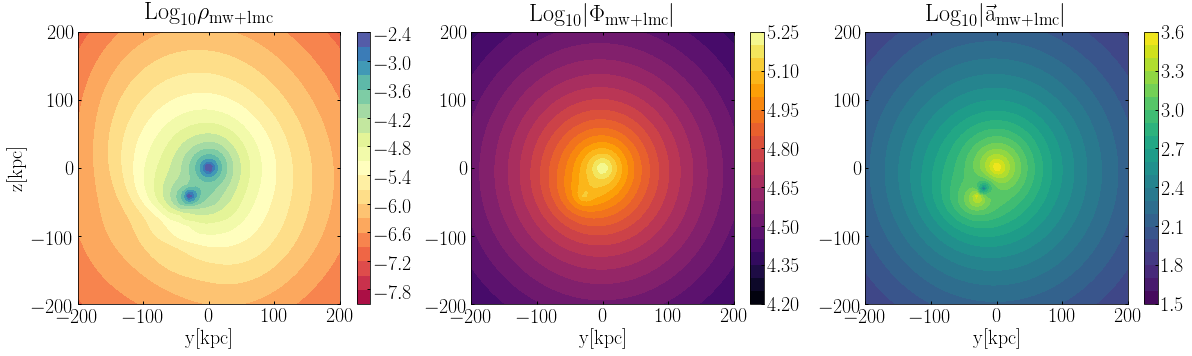

In [221]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].set_title(r'$\rm{Log}_{10}\rho_{mw+lmc}$')
im1 = ax[0].contourf(y_grid, z_grid, np.log10(np.abs(dens_ratio_all)), 20, origin='lower', cmap='Spectral')
cbar1 = colorbar(im1, orientation='vertical', ax=ax[0])
ax[0].set_xlim(-200, 200)
ax[0].set_ylim(-200, 200)

ax[1].set_title(r'$\rm{Log}_{10}|\Phi_{mw+lmc}|$')
im2 = ax[1].contourf(y_grid, z_grid, np.log10(np.abs(pot_ratio_all)), 20, origin='lower', cmap='inferno')
cbar2= colorbar(im2, orientation='vertical', ax=ax[1])
ax[1].set_xlim(-200, 200)
ax[1].set_ylim(-200, 200)

ax[2].set_title(r'$\rm{Log}_{10}|\vec{a}_{mw+lmc}|$')
im3 = ax[2].contourf(y_grid, z_grid, np.log10(np.abs(a_ratio_all)), 20, origin='lower', cmap='viridis')
cbar3 = colorbar(im3, orientation='vertical', ax=ax[2])
ax[2].set_xlim(-200, 200)
ax[2].set_ylim(-200, 200)
ax[2].set_xlabel('y[kpc]')
ax[1].set_xlabel('y[kpc]')
ax[0].set_xlabel('y[kpc]')
ax[0].set_ylabel('z[kpc]')

savefig('mwlmc_all.pdf', bbox_inches='tight')

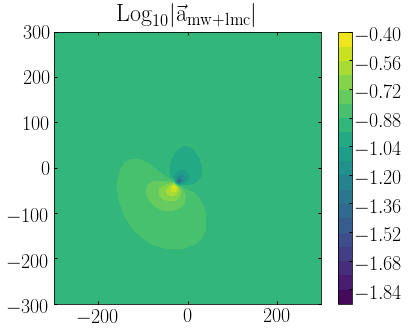

In [245]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
title(r'$\rm{Log}_{10}|\vec{a}_{mw+lmc}|$')
contourf(y_grid, z_grid, np.log10((a_ratio_all/a_mono_all.reshape(110, 110)))-1, 20, origin='lower', cmap='viridis')
colorbar()

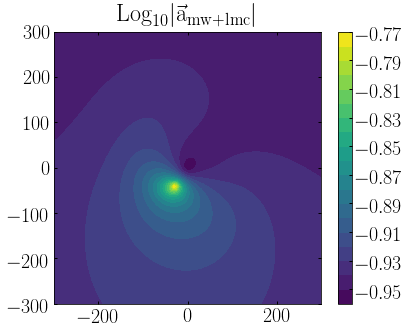

In [246]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
title(r'$\rm{Log}_{10}|\vec{a}_{mw+lmc}|$')
contourf(y_grid, z_grid, np.log10((pot_ratio_all/pot_mono.reshape(110, 110)))-1, 20, origin='lower', cmap='viridis')
colorbar()

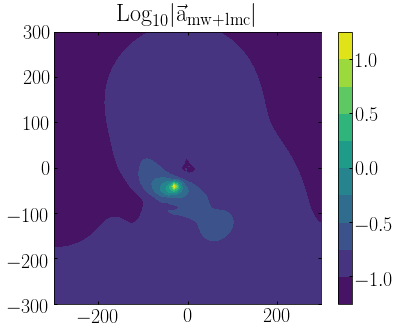

In [241]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
title(r'$\rm{Log}_{10}|\vec{a}_{mw+lmc}|$')
contourf(y_grid, z_grid, np.log10((dens_ratio_all/rho_mono.reshape(110, 110)))-1, 10, origin='lower', cmap='viridis')
colorbar()

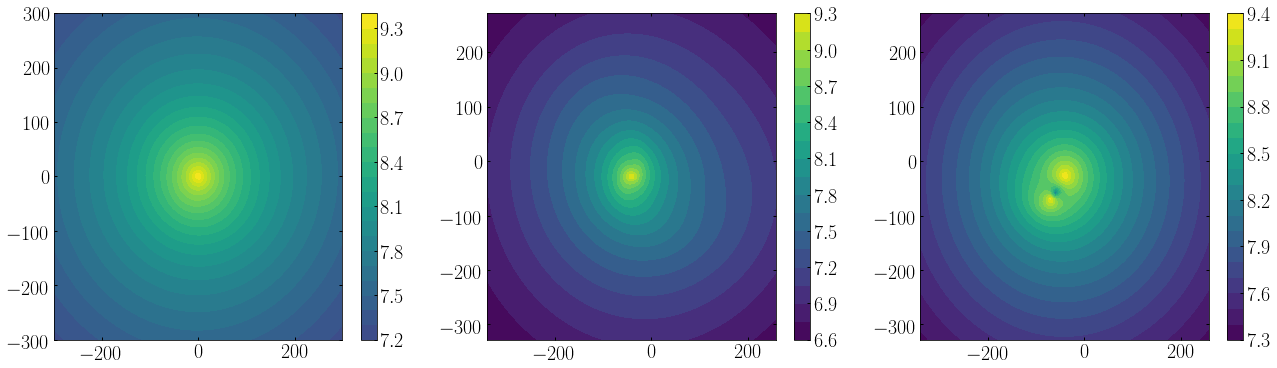

In [332]:
figure(figsize=(22,6))
subplot(1, 3, 1)
contourf(y_grid, z_grid, np.log10((np.abs(a_mw_all.reshape(110, 110)))),20,  
         origin='lower', vmin=6.6, vmax=9.4)
colorbar()

subplot(1, 3, 2)
contourf(y_grid+ylmc_com, z_grid+zlmc_com, np.log10(np.abs(a_lmc_all.reshape(110, 110))), 20, vmin=6.6, vmax=9.4)
colorbar()

subplot(1, 3, 3)
contourf(y_grid+ylmc_com, z_grid+zlmc_com, np.log10(np.abs(a_ratio_all)), 20, origin='lower')
colorbar()

savefig('acceleration_mw_lmc_ratio.pdf', bbox_inches='tight')

In [330]:
rho_all = np.zeros((110, 110))

In [202]:
for i in range(110):
    for j in range(110):
        rho_all[i][j] = biff.density(np.array([[0-xlmc_com], [y_grid2[0][i]], [z_grid2[j,0]]]).T, S_lmc_1e6, T_lmc_1e6, M=11.41*1E6,r_s=10) + biff.density(np.array([[0], [y_grid[0][i]], [z_grid[j,0]]]).T, S_matrix_mw_1e6_opt, T_matrix_mw_1e6_opt, M=1, r_s=40.85)

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'orgin'
  s)


Text(0,0.5,'z[kpc]')

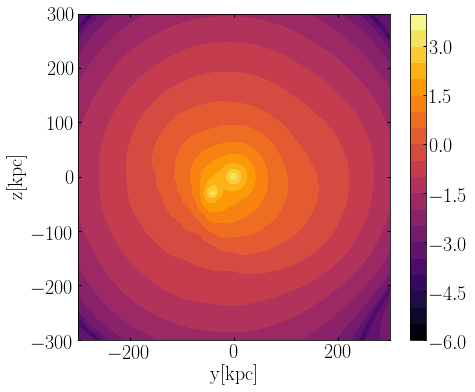

In [214]:
figure(figsize=(7,6))
contourf(y_grid, z_grid, np.log10(np.abs(rho_all.reshape((110, 110)).T)), 20, cmap='inferno', orgin='lower')
colorbar()
xlim(-300, 300)
ylim(-300, 300)
xlabel('y[kpc]')
ylabel('z[kpc]')

In [223]:
# Most energetic coefficients of the LMC

def Anl(n, l):
    knl = 0.5*n*(n+4*l+3) + (l+1)*(2*l+1)
    A_nl = - 2**(8*l+6)/(4*np.pi*knl) * (special.factorial(n)*(n+2*l+3/2.)*(special.gamma(2*l+3/2.))**2)/(special.gamma(n+4*l+3))
    return A_nl

A_nl_array = np.zeros((41, 21))
for j in range(41):
    for i in range(21):
        A_nl_array[j][i] = Anl(j, i)


In [251]:
E = np.zeros(shape(S_lmc_1e6))
for m in range(20):
    E[:,:,m] = np.abs(0.5*((1E6*S_lmc_1e6[:,:,m])**2 + (1E6*T_lmc_1e6[:,:,m])**2)/A_nl_array)

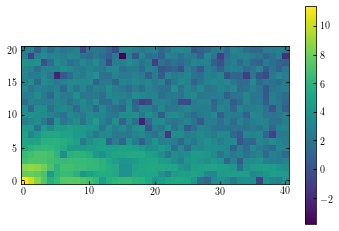

In [252]:
imshow(np.log10(E[:,:,0].T), origin='lower')
colorbar()

In [237]:
def copy_matrix(M, indices):
    M_new = np.zeros(shape(M))
    for i in range(len(indices[0])):
        M_new[indices[0][i]][indices[1][i]][indices[2][i]] = M[indices[0][i]][indices[1][i]][indices[2][i]]
    return M_new

def coefficients_energy_level(S, T, e_cut, verb=0):
    """
    Returns coefficients with energy higher than e_cut
    e_cut : float 
        between 0 and 1
        
    """
    n_max = shape(S)[0]
    l_max = shape(S)[1]
    m_max = shape(S)[2]
    
    
    A_nl_array = np.zeros((n_max, l_max))
    for j in range(n_max):
        for i in range(l_max):
            A_nl_array[j][i] = Anl(j, i)
    A_nl_matrix = np.zeros((n_max, l_max, m_max))
    for i in range(m_max):
        A_nl_matrix[:,:,i] = A_nl_array
    
    U_nlm = 0.5*(S**2 + T**2)/A_nl_matrix
    U_all = np.sum(U_nlm)
    energy_cut = np.where(np.log10(np.abs(U_nlm))>np.log10(np.abs(U_all))*e_cut)
    if verb == 1:
        print('\sum U = ',np.log10(np.abs(U_all)))
        print('U cut = ',np.log10(np.abs(U_all))*e_cut)
        print('N coeff = ', len(energy_cut[0]))

    S_new = copy_matrix(S, energy_cut)
    T_new = copy_matrix(T, energy_cut)
    return S_new, T_new, [np.max(energy_cut[0]) ,np.max(energy_cut[1]), np.max(energy_cut[2]), len(energy_cut[0])]
    
    

In [388]:
S_lmc_cut, T_lmc_cut, others = coefficients_energy_level(1E6*S_lmc_1e6, 1E6*T_lmc_1e6, 0.6, verb=1)

\sum U =  11.4301787436
U cut =  6.85810724619
N coeff =  75


/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


In [452]:
xyz2 = np.ascontiguousarray(np.array([np.ones(len(y_grid.flatten())),
                                     y_grid.flatten(), z_grid.flatten()]).T)

xyz3 = np.ascontiguousarray(np.array([y_grid.flatten(), np.ones(len(y_grid.flatten())), z_grid.flatten()]).T)

In [396]:
rho_lmc_70 = biff.density(xyz2, S_lmc_cut, T_lmc_cut, M=1E6*11.41, r_s=10)
acc_lmc_70 = biff.gradient(xyz2, S_lmc_cut, T_lmc_cut, M=1E6*11.41, r_s=10, G=G_gadget)
pot_lmc_70 = biff.potential(xyz2, S_lmc_cut, T_lmc_cut, M=1E6*11.41, r_s=10, G=G_gadget)
acc_all_70 = np.sqrt(acc_lmc_70[:,0]**2  + acc_lmc_70[:,1]**2 + acc_lmc_70[:,2]**2)

In [453]:
rho_lmc_70_3 = biff.density(xyz3, S_lmc_cut, T_lmc_cut, M=1E6*11.41, r_s=10)
acc_lmc_70_3 = biff.gradient(xyz3, S_lmc_cut, T_lmc_cut, M=1E6*11.41, r_s=10, G=G_gadget)
pot_lmc_70_3 = biff.potential(xyz3, S_lmc_cut, T_lmc_cut, M=1E6*11.41, r_s=10, G=G_gadget)
acc_all_70_3 = np.sqrt(acc_lmc_70_3[:,0]**2  + acc_lmc_70_3[:,1]**2 + acc_lmc_70_3[:,2]**2)

In [457]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

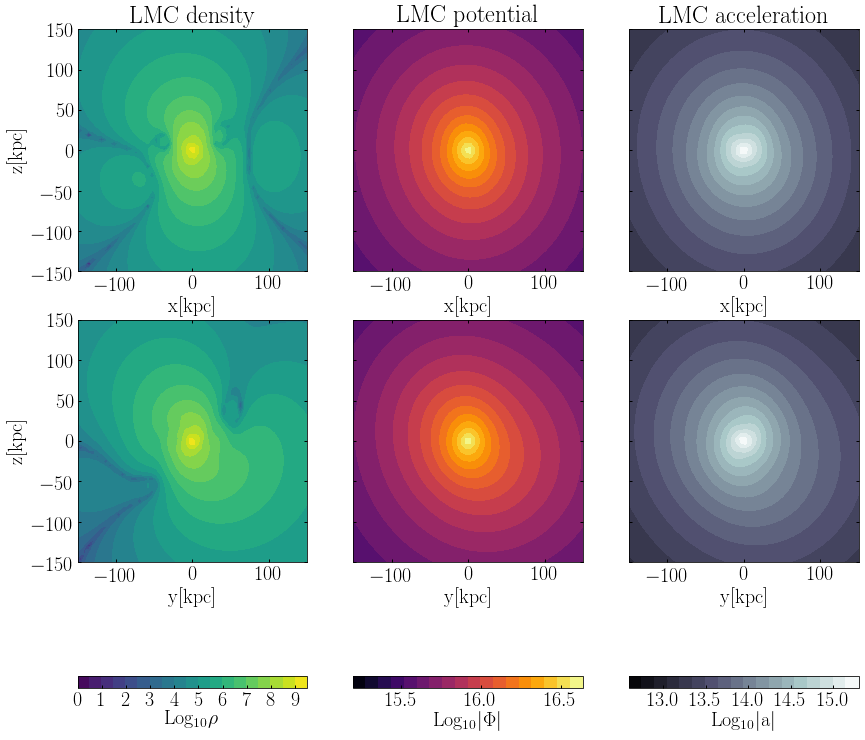

In [495]:
fig, ax = plt.subplots(2, 3, figsize=(14, 14), sharey=True)

ax[0][0].set_title('LMC density')

im = ax[0][0].contourf(y_grid, z_grid, np.log10(np.abs(rho_lmc_70_3.reshape(110, 110))), 20)
ax[1][0].set_ylabel('z[kpc]')
ax[1][0].set_xlim(-150, 150)
ax[1][0].set_ylim(-150, 150)

im = ax[1][0].contourf(y_grid, z_grid, np.log10(np.abs(rho_lmc_70.reshape(110, 110))), 20)
ax[0][0].set_xlabel('x[kpc]')
ax[0][0].set_ylabel('z[kpc]')
ax[0][1].set_xlabel('x[kpc]')
ax[0][2].set_xlabel('x[kpc]')

ax[0][0].set_xlim(-150, 150)
ax[0][0].set_ylim(-150, 150)
ax[0][1].set_xlim(-150, 150)
ax[0][1].set_ylim(-150, 150)
ax[0][2].set_xlim(-150, 150)
ax[0][2].set_ylim(-150, 150)



cbar1 = colorbar(im, orientation='horizontal', ax=ax[:,0])
cbar1.set_label(r'$\rm{Log_{10}}\rho$')
ax[1][0].set_xlabel('y[kpc]')
ax[1][0].set_ylabel('z[kpc]')
ax[1][0].set_xlim(-150, 150)
ax[1][0].set_ylim(-150, 150)

im2 = ax[0][1].contourf(y_grid, z_grid, np.log10(np.abs(pot_lmc_70_3.reshape(110, 110))), 20, cmap='inferno')


ax[0][1].set_title('LMC potential')
im2 = ax[1][1].contourf(y_grid, z_grid, np.log10(np.abs(pot_lmc_70.reshape(110, 110))), 20, cmap='inferno')
cbar2 = colorbar(im2, orientation='horizontal', ax=ax[:,1])
cbar2.set_ticks(np.arange(14.0, 17, 0.5))
cbar2.set_label(r'$\rm{Log_{10}}|\Phi|$')
ax[1][1].set_xlabel('y[kpc]')
ax[1][1].set_xlim(-150, 150)
ax[1][1].set_ylim(-150, 150)

im3 = ax[0][2].contourf(y_grid, z_grid, np.log10((acc_all_70_3.reshape(110, 110))), 20, cmap='bone')


ax[0][2].set_title('LMC acceleration')
im3 = ax[1][2].contourf(y_grid, z_grid, np.log10((acc_all_70.reshape(110, 110))), 20, cmap='bone')
cbar3= colorbar(im3, orientation='horizontal', ax=ax[:,2])
cbar3.set_ticks(np.arange(12, 15.5, 0.5))
cbar3.set_label(r'$\rm{Log_{10}}|a|$')
ax[1][2].set_xlabel('y[kpc]')
ax[1][2].set_xlim(-150, 150)
ax[1][2].set_ylim(-150, 150)

savefig('LMC_projections.pdf')

In [368]:
a_ratio_cut = np.zeros((110, 110))
for i in range(110):
    for j in range(110):
        a_all = biff.gradient(np.array([[0-xlmc_com], [y_grid2[0][i]], [z_grid2[j,0]]]).T,
                                      S_lmc_cut, T_lmc_cut, M=11.41,r_s=10, G=G_gadget) + \
                            biff.gradient(np.array([[0], [y_grid[0][i]], [z_grid[j,0]]]).T, S_matrix_mw_1e6_opt,
                                      T_matrix_mw_1e6_opt, M=1, r_s=40.85, G=G_gadget)
        a_ratio_cut[i][j] = np.sqrt(a_all[0][0]**2 + a_all[0][1]**2 + a_all[0][2]**2) / a_ratio_all[i][j]

(-100, 100)

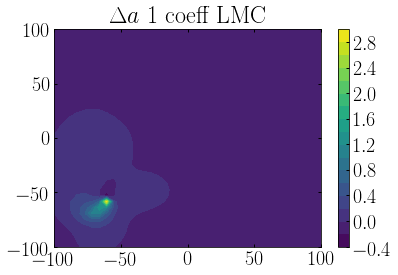

In [379]:
title(r'$\Delta a$  1 coeff LMC')
contourf(y_grid+ylmc_com, z_grid+zlmc_com, (a_ratio_cut.reshape(110, 110)-1), 20)
colorbar()
xlim(-100, 100)
ylim(-100, 100)
#savefig('ratio_a_09.pdf', bbox_inches='tight')